# Luna16 Grand Challenge Data
## Lung Nodule Analysis

Competition website https://luna16.grand-challenge.org/description/

Candidate Section adapted from https://luna16.grand-challenge.org/tutorial/

In [1]:
import SimpleITK as sitk
import numpy as np
import pandas as pd
import os
from glob import glob
from PIL import Image
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

data_path = '/home/ubuntu/fs/data/luna16/'
scan_path = data_path+'scans/'
csv_path = data_path+'csvfiles/'

## Candidate Data

Helper Functions

Load '.mhd' image using SimpleITK

In [2]:
def load_itk_image(filename):
    itkimage = sitk.ReadImage(filename)
    numpyImage = sitk.GetArrayFromImage(itkimage)
    
    numpyOrigin = np.array(list(reversed(itkimage.GetOrigin())))
    numpySpacing = np.array(list(reversed(itkimage.GetSpacing())))
    
    return numpyImage, numpyOrigin, numpySpacing

Convert from world coordinates to voxel coordinates

In [3]:
def worldToVoxelCoord(worldCoord, origin, spacing):
    strechedVoxelCoord = np.absolute(worldCoord - origin)
    voxelCoord = strechedVoxelCoord / spacing
    return voxelCoord.astype(int)

Normalize Image

In [4]:
def normalizePlanes(npzarray):
    maxHU = 400.
    minHU = -1000.
    
    npzarray = (npzarray - minHU) / (maxHU - minHU)
    npzarray[npzarray > 1] = 1
    npzarray[npzarray < 0] = 0
    return npzarray

### View Candidate Classes

In [5]:
# get image path and id
imgs = glob(scan_path+'*.mhd')
cand_path = csv_path+'candidates.csv'
img_path = imgs[0]
img_id = os.path.basename(img_path)[:-4]
print(img_path)
print(img_id)

/home/ubuntu/fs/data/luna16/scans/1.3.6.1.4.1.14519.5.2.1.6279.6001.265780642925621389994857727416.mhd
1.3.6.1.4.1.14519.5.2.1.6279.6001.265780642925621389994857727416


In [6]:
# load image
numpyImage, numpyOrigin, numpySpacing = load_itk_image(img_path)
print numpyImage.shape
print numpyOrigin
print numpySpacing

(236, 512, 512)
[-296.       -180.       -159.800003]
[ 1.25      0.703125  0.703125]


In [7]:
# load candidate data
df_cand = pd.read_csv(cand_path)
df_cand.head()

,seriesuid,coordX,coordY,coordZ,class
0,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,-56.08,-67.85,-311.92,0
1,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,53.21,-244.41,-245.17,0
2,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,103.66,-121.80,-286.62,0
3,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,-33.66,-72.75,-308.41,0
4,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,-32.25,-85.36,-362.51,0


In [8]:
# get all candidates for image
df_cand_mini = df_cand[df_cand['seriesuid'] == img_id]
print(len(df_cand_mini.index))
df_cand_mini.head()

247


,seriesuid,coordX,coordY,coordZ,class
298672,1.3.6.1.4.1.14519.5.2.1.6279.6001.265780642925...,66.007455,6.633901,-188.457905,0
298673,1.3.6.1.4.1.14519.5.2.1.6279.6001.265780642925...,96.242931,-16.617780,-189.117420,0
298674,1.3.6.1.4.1.14519.5.2.1.6279.6001.265780642925...,80.036245,-1.633892,-150.715716,0
298675,1.3.6.1.4.1.14519.5.2.1.6279.6001.265780642925...,36.600621,-22.705559,-41.009352,0
298676,1.3.6.1.4.1.14519.5.2.1.6279.6001.265780642925...,-11.519600,-55.649334,-68.615000,0


In [9]:
# split into two dataframes for plotting
df_pos = df_cand_mini[df_cand_mini['class'] == 1]
df_neg = df_cand_mini[df_cand_mini['class'] == 0]

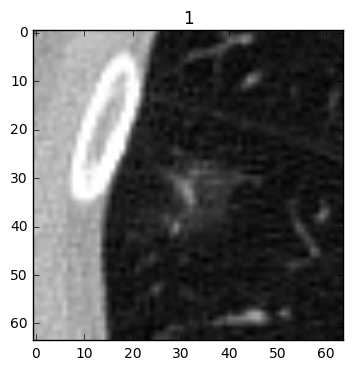

In [10]:
# view positives
for index, row in df_pos[:5].iterrows():
    worldCoord = np.asarray([float(row['coordZ']),float(row['coordY']),float(row['coordX'])])
    voxelCoord = worldToVoxelCoord(worldCoord, numpyOrigin, numpySpacing)
    voxelWidth = 65
    patch = numpyImage[voxelCoord[0],voxelCoord[1]-voxelWidth/2:voxelCoord[1]+voxelWidth/2,voxelCoord[2]-voxelWidth/2:voxelCoord[2]+voxelWidth/2]
    patch = normalizePlanes(patch)
    plt.imshow(patch, cmap='gray')
    plt.title(row['class'])
    plt.show()

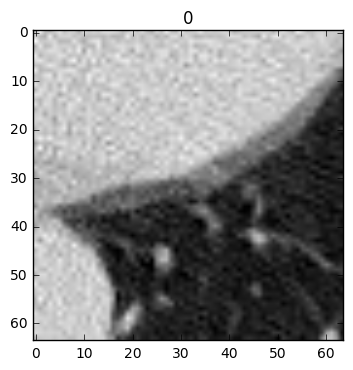

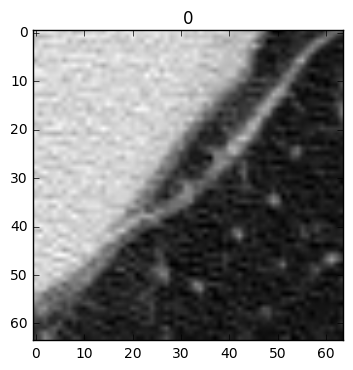

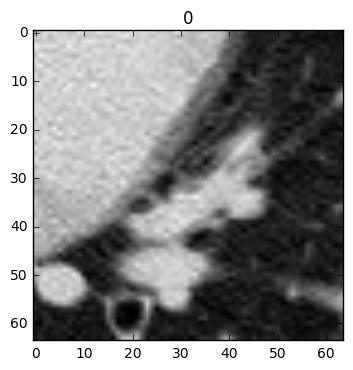

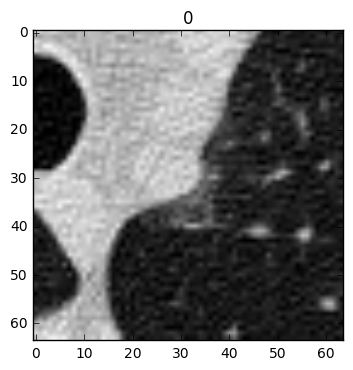

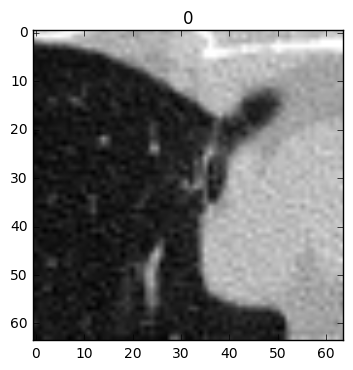

In [11]:
# view negatives
for index, row in df_neg[:5].iterrows():
    worldCoord = np.asarray([float(row['coordZ']),float(row['coordY']),float(row['coordX'])])
    voxelCoord = worldToVoxelCoord(worldCoord, numpyOrigin, numpySpacing)
    voxelWidth = 65
    patch = numpyImage[voxelCoord[0],voxelCoord[1]-voxelWidth/2:voxelCoord[1]+voxelWidth/2,voxelCoord[2]-voxelWidth/2:voxelCoord[2]+voxelWidth/2]
    patch = normalizePlanes(patch)
    plt.imshow(patch, cmap='gray')
    plt.title(row['class'])
    plt.show()

## View Annotations

In [12]:
ann_csv = csv_path+'annotations.csv'
df = pd.read_csv(ann_csv)
print(len(df))
df.head()

1186


,seriesuid,coordX,coordY,coordZ,diameter_mm
0,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,-128.699421,-175.319272,-298.387506,5.651471
1,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,103.783651,-211.925149,-227.121250,4.224708
2,1.3.6.1.4.1.14519.5.2.1.6279.6001.100398138793...,69.639017,-140.944586,876.374496,5.786348
3,1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016...,-24.013824,192.102405,-391.081276,8.143262
4,1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016...,2.441547,172.464881,-405.493732,18.545150


Get maximums for each seriesuid

1. Groupby id
2. Set each diameter_mm to maximum for that group
3. Get indexes where id has that value in group
4. Use those indexes to create new df

In [13]:
idx = df.groupby('seriesuid')['diameter_mm'].transform(max) == df['diameter_mm']
df_max = df[idx]
df_max.head()

,seriesuid,coordX,coordY,coordZ,diameter_mm
0,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,-128.699421,-175.319272,-298.387506,5.651471
2,1.3.6.1.4.1.14519.5.2.1.6279.6001.100398138793...,69.639017,-140.944586,876.374496,5.786348
4,1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016...,2.441547,172.464881,-405.493732,18.545150
7,1.3.6.1.4.1.14519.5.2.1.6279.6001.100953483028...,81.509646,54.957219,-150.346423,10.362321
8,1.3.6.1.4.1.14519.5.2.1.6279.6001.102681962408...,105.055792,19.825260,-91.247251,21.089619


In [14]:
# verify that we have one value per id
print(len(df_max), len(df['seriesuid'].unique()))

(601, 601)


In [15]:
# sort df_max
df_max_sort = df_max.sort_values(by='diameter_mm', ascending=False)
df_max_sort.head()

,seriesuid,coordX,coordY,coordZ,diameter_mm
765,1.3.6.1.4.1.14519.5.2.1.6279.6001.287966244644...,67.827256,85.379925,-109.746724,32.270030
34,1.3.6.1.4.1.14519.5.2.1.6279.6001.112740418331...,47.671057,37.642520,-99.890394,30.610406
1160,1.3.6.1.4.1.14519.5.2.1.6279.6001.943403138251...,-46.949664,72.636454,-95.644521,27.442423
998,1.3.6.1.4.1.14519.5.2.1.6279.6001.481278873893...,-103.132511,-5.774673,-206.355470,27.075443
1002,1.3.6.1.4.1.14519.5.2.1.6279.6001.487268565754...,119.208776,11.450374,-165.039862,26.837081


In [16]:
# get patient with largest nodule
ann_data = df_max_sort.iloc[300]
filename = scan_path+ann_data['seriesuid']+'.mhd'
image, origin, spacing = load_itk_image(scan_path+ann_data['seriesuid']+'.mhd')

In [17]:
worldCoord = np.asarray([ann_data['coordZ'], ann_data['coordY'], ann_data['coordX']])
voxelCoord = worldToVoxelCoord(worldCoord, origin, spacing)

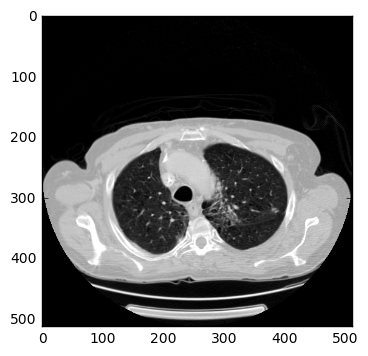

In [18]:
img = normalizePlanes(image[voxelCoord[0]])
plt.imshow(img, cmap=plt.cm.gray)
plt.show()

In [19]:
def get_mask(dims, diameter, width, height):
    img = np.zeros((width, height), np.uint8)
    cv2.circle(img, dims, int(diameter), (1,1,1), -1)
    return img

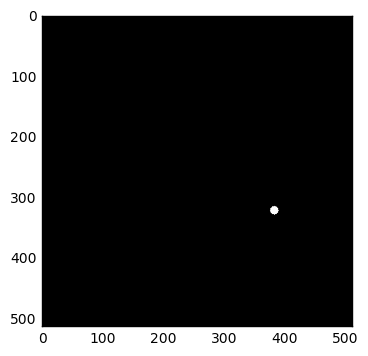

In [20]:
node_mask = get_mask((voxelCoord[2], voxelCoord[1]), ann_data['diameter_mm'],
               512, 512)
plt.imshow(node_mask, cmap=plt.cm.gray)
plt.show()

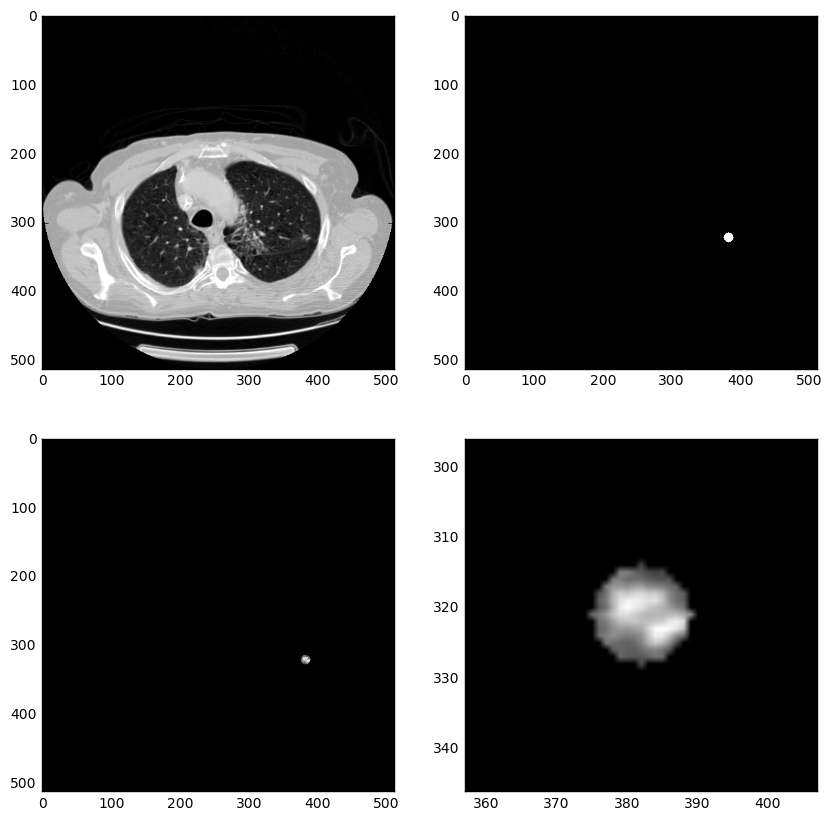

In [21]:
fig, ax = plt.subplots(2,2,figsize=[10,10])
ax[0,0].imshow(img, cmap=plt.cm.gray)
ax[0,1].imshow(node_mask, cmap=plt.cm.gray)
ax[1,0].imshow(img*node_mask, cmap=plt.cm.gray)
ax[1,1].imshow(img*node_mask, cmap=plt.cm.gray)
ax[1,1].set_xlim([voxelCoord[2]-25, voxelCoord[2]+25])
ax[1,1].set_ylim([voxelCoord[1]+25, voxelCoord[1]-25])
plt.show()

## Lung Segmentation

In [22]:
from skimage import morphology
from skimage import measure
from sklearn.cluster import KMeans
from skimage.transform import resize

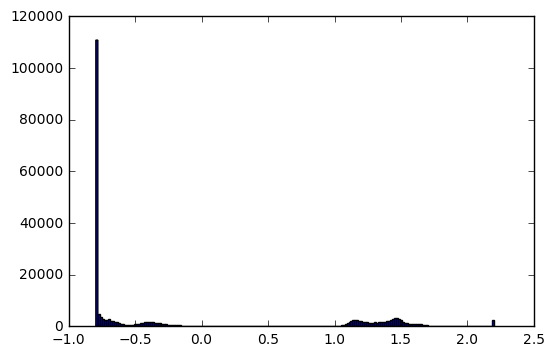

In [23]:
mean = np.mean(img)
std = np.std(img)
img = img-mean
img = img/std
plt.hist(img.flatten(),bins=200)
plt.show()

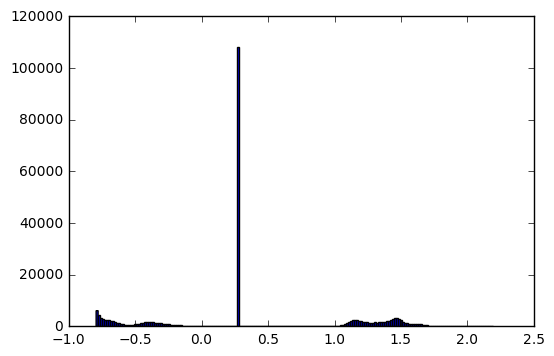

In [24]:
middle = img[100:400,100:400] 
mean = np.mean(middle)  
max = np.max(img)
min = np.min(img)
#move the underflow bins
img[img==max]=mean
img[img==min]=mean
plt.hist(img.flatten(),bins=200)
plt.show()

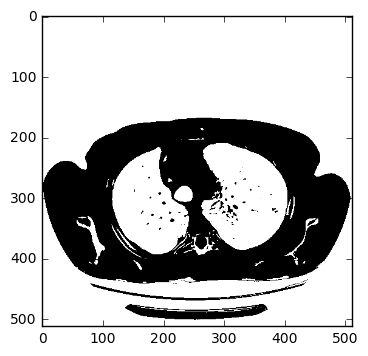

In [25]:
kmeans = KMeans(n_clusters=2).fit(np.reshape(middle,[np.prod(middle.shape),1]))
centers = sorted(kmeans.cluster_centers_.flatten())
threshold = np.mean(centers)
thresh_img = np.where(img<threshold,1.0,0.0)  # threshold the image
plt.imshow(thresh_img, cmap=plt.cm.gray)
plt.show()

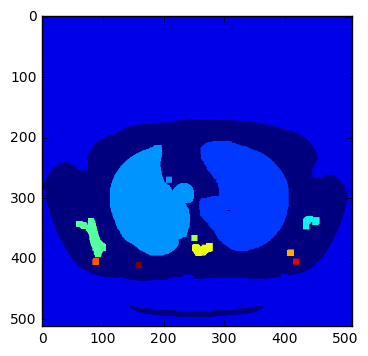

In [26]:
eroded = morphology.erosion(thresh_img,np.ones([4,4]))
dilation = morphology.dilation(eroded,np.ones([10,10]))
labels = measure.label(dilation)
label_vals = np.unique(labels)
plt.imshow(labels)
plt.show()

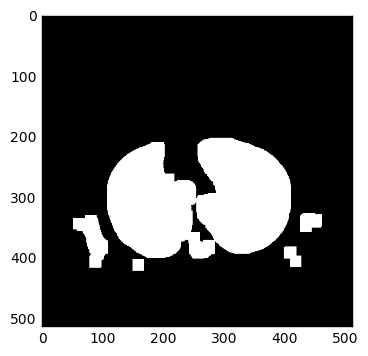

In [27]:
labels = measure.label(dilation)
label_vals = np.unique(labels)
regions = measure.regionprops(labels)
good_labels = []
for prop in regions:
    B = prop.bbox
    if B[2]-B[0]<475 and B[3]-B[1]<475 and B[0]>40 and B[2]<472:
        good_labels.append(prop.label)
mask = np.ndarray([512,512],dtype=np.int8)
mask[:] = 0
#
#  The mask here is the mask for the lungs--not the nodes
#  After just the lungs are left, we do another large dilation
#  in order to fill in and out the lung mask 
#
for N in good_labels:
    mask = mask + np.where(labels==N,1,0)
mask = morphology.dilation(mask,np.ones([10,10])) # one last dilation
plt.imshow(mask,cmap='gray')

In [28]:
img = mask*img

#
# renormalizing the masked image (in the mask region)
#
new_mean = np.mean(img[mask>0])  
new_std = np.std(img[mask>0])
#
#  Pushing the background color up to the lower end
#  of the pixel range for the lungs
#
old_min = np.min(img)       # background color
img[img==old_min] = new_mean-1.2*new_std   # resetting backgound color
img = img-new_mean
img = img/new_std

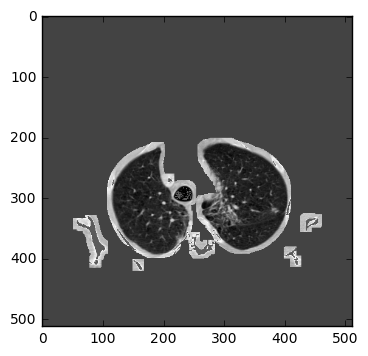

In [29]:
plt.imshow(img, cmap='gray')
plt.show()

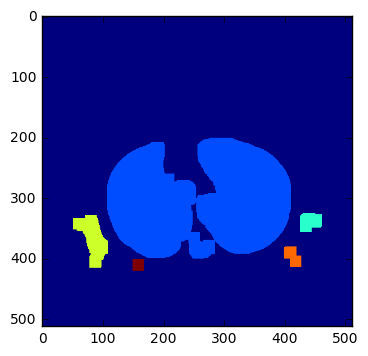

60297
1116
5046
986
361


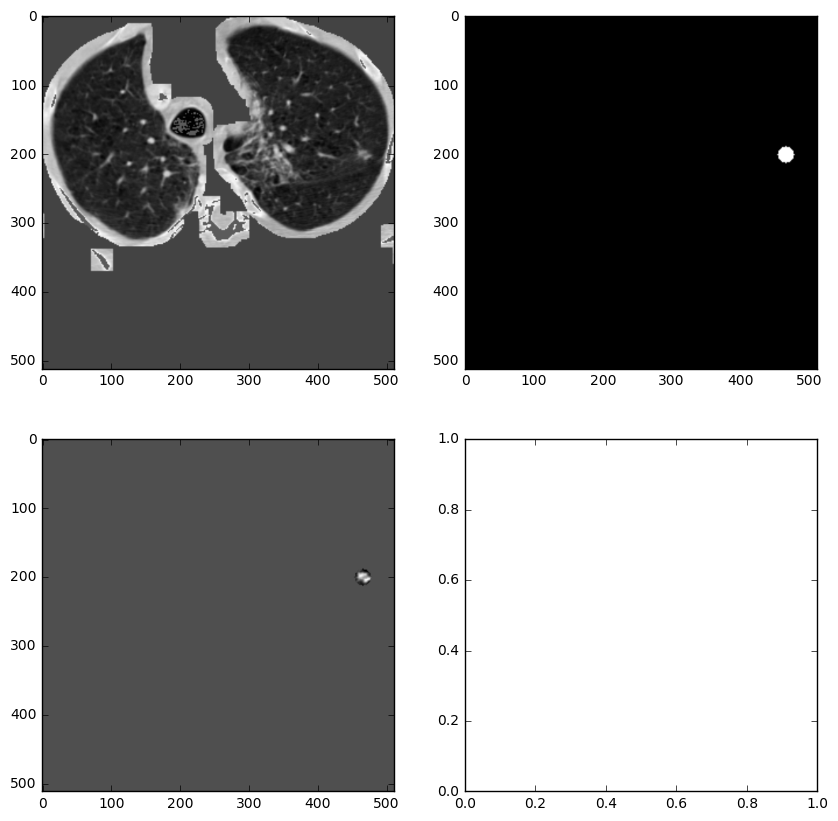

In [30]:
#make image bounding box  (min row, min col, max row, max col)
labels = measure.label(mask)
regions = measure.regionprops(labels)
plt.imshow(labels)
plt.show()
#
# Finding the global min and max row over all regions
#
min_row = 512
max_row = 0
min_col = 512
max_col = 0
for prop in regions:
    B = prop.bbox
    
    # get region area
    area = (B[2]-B[0])*(B[3]-B[1])
    print(area)
    if area > 10000:
        if min_row > B[0]:
            min_row = B[0]
        if min_col > B[1]:
            min_col = B[1]
        if max_row < B[2]:
            max_row = B[2]
        if max_col < B[3]:
            max_col = B[3]
            
width = max_col-min_col
height = max_row - min_row
if width > height:
    max_row=min_row+width
else:
    max_col = min_col+height
# 
# cropping the image down to the bounding box for all regions
# (there's probably an skimage command that can do this in one line)
# 
new_img = img[min_row:max_row,min_col:max_col]
#mask =  mask[min_row:max_row,min_col:max_col]
if max_row-min_row <5 or max_col-min_col<5:  # skipping all images with no good regions
    pass
else:
    # moving range to -1 to 1 to accomodate the resize function
    mean = np.mean(new_img)
    new_img = new_img - mean
    min = np.min(new_img)
    max = np.max(new_img)
    new_img = new_img/(max-min)
    new_img = resize(new_img,[512,512])
    new_node_mask = resize(node_mask[min_row:max_row,min_col:max_col],[512,512])
    
    fig, ax = plt.subplots(2,2,figsize=[10,10])
    ax[0,0].imshow(new_img, cmap=plt.cm.gray)
    ax[0,1].imshow(new_node_mask, cmap=plt.cm.gray)
    ax[1,0].imshow(new_img*new_node_mask, cmap=plt.cm.gray)
    plt.show()

In [39]:
from keras.preprocessing.image import random_rotation, random_shift

In [32]:
new_img.shape

(512, 512)

In [34]:
img_rot = np.stack([new_img, new_node_mask])

In [35]:
img_rot.shape

(2, 512, 512)

In [36]:
img_rot = random_rotation(img_rot, 90)

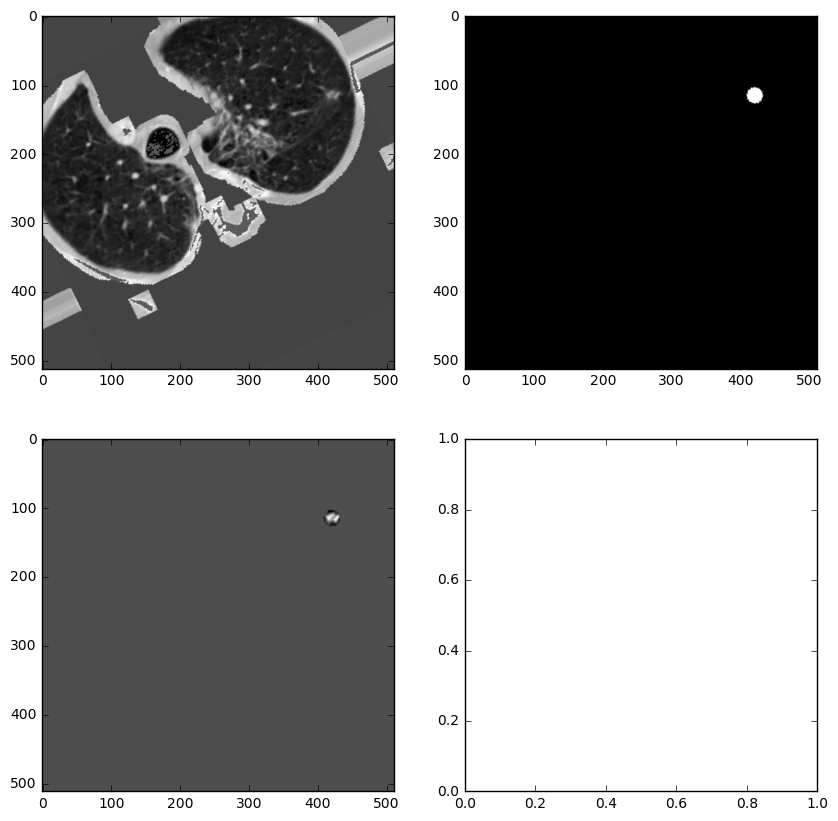

In [38]:
fig, ax = plt.subplots(2,2,figsize=[10,10])
ax[0,0].imshow(img_rot[0], cmap=plt.cm.gray)
ax[0,1].imshow(img_rot[1], cmap=plt.cm.gray)
ax[1,0].imshow(img_rot[0]*img_rot[1], cmap=plt.cm.gray)
plt.show()

In [40]:
img_shift = np.stack([new_img, new_node_mask])

In [41]:
img_shift = random_shift(img_shift, 0.10, 0.10)

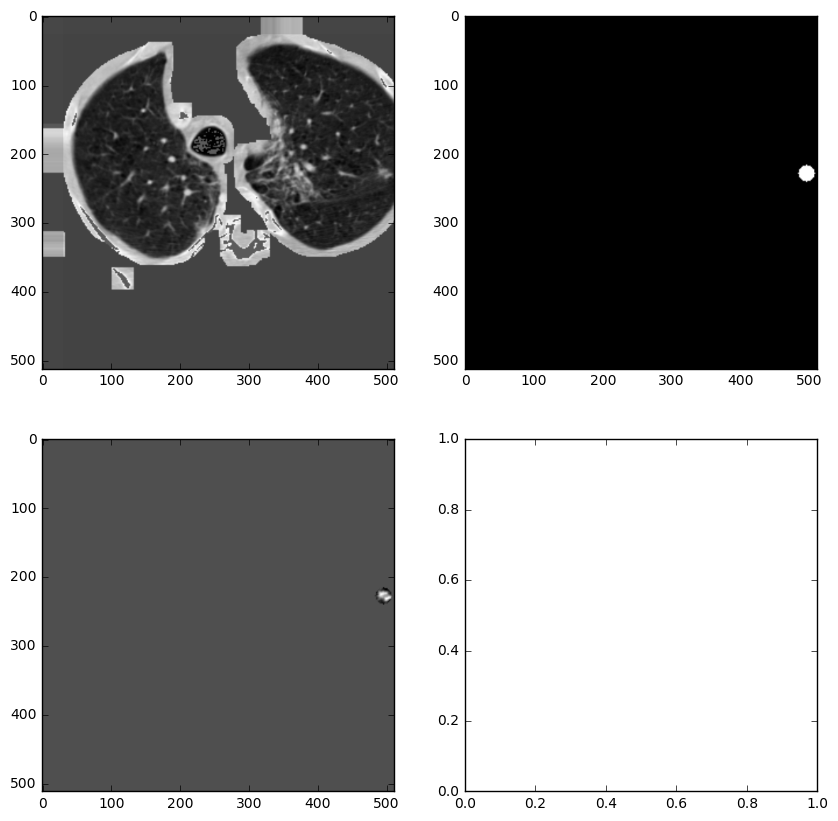

In [42]:
fig, ax = plt.subplots(2,2,figsize=[10,10])
ax[0,0].imshow(img_shift[0], cmap=plt.cm.gray)
ax[0,1].imshow(img_shift[1], cmap=plt.cm.gray)
ax[1,0].imshow(img_shift[0]*img_shift[1], cmap=plt.cm.gray)
plt.show()